<img src="https://s8.hostingkartinok.com/uploads/images/2018/08/308b49fcfbc619d629fe4604bceb67ac.jpg" width=500,>
<h3 style="text-align: center;"><b>Физтех-Школа Прикладной математики и информатики (ФПМИ) МФТИ</b></h3>

---

<h2 style="text-align: center;"><b>Многослойная сеть на PyTorch</b></h3>

В этом ноутбке мы научимся писать свои нейросети на фреймворке PyTorch, конкретно - рассмотрим, как написать многослойную полносвязную сеть (Fully-Connected, FC), и сравним их качество на датасете картинок MNIST.

<h3 style="text-align: center;"><b>Компоненты нейросети</b></h3>

Здесь самое время напомнить о том, какие вещи играют принципиальную роль в построении любой ***нейронной сети*** (все их мы задаём *руками*, самостоятельно):  

- непосредственно, сама **архитектура** нейросети (сюда входят типы функций активации у каждого нейрона);
- начальная **инициализация** весов каждого слоя;
- метод **оптимизации** нейросети (сюда ещё входит метод изменения `learning_rate`);
- размер **батчей** (`batch_size`);
- количество итераций обучения (`num_epochs`);
- **функция потерь** (`loss`);  
- тип **регуляризации** нейросети (для каждого слоя можно свой);  

То, что связано с ***данными и задачей***:  
- само **качество** выборки (непротиворечивость, чистота, корректность постановки задачи);  
- **размер** выборки;  

<h3 style="text-align: center;"><b>Многослойная нейронная сеть</b></h3>

Как можно понять из названия, многослойная нейросеть состоит из нескольких **слоёв**. Каждый слой состоит из **нейронов**. Ранее мы уже писали свой нейрон на NumPy, вот из таких нейронов и состоит ***MLP (Multi-Layer Perceptron)***. Ещё такую многослойную нейросеть, у которой каждый нейрон на предыдущем уровне соединён с нейроном на следующем уровне, называют ***Fully-Connected-сетью*** (или ***Dense-сетью***).  

Расмотрим их устройство более подробно:

* Вот так выглядит двухслойная нейросеть (первый слой - input layer - не считается, потому что это, по сути, не слой):

<img src="http://cs231n.github.io/assets/nn1/neural_net.jpeg" width=300, height=200>

* Так выглядит трёхслойная нейросеть:

<img src="http://cs231n.github.io/assets/nn1/neural_net2.jpeg" width=400>

.. и так далее для большего случая слоёв.

**Обратите внимание:** связи есть у нейронов со слоя $L_{i-1}$  и нейронов $L_{i}$, но между нейронами в одном слое связей **нет**.

**Входной слой** -- это данные (матрица $(n, m)$).

Слои, которые не являются входными или выходными, называются **скрытыми слоями (hidden layers)**.

При решении ***задачи регрессии*** на **выходном слое** обычно один нейрон, который возвращает предсказанные числа (для каждого объекта по числу).  

В случае ***задачи классификации*** на **выходном слое** обычно один нейрон, если задача бинарной классификации, и $K$ нейронов, если задача $K$-класовой классификации.

#### Forward pass в MLP

Каждый слой многослойной нейросети - это матрица весов, строки которой - это нейроны (одна строка - один нейрон), а столбцы - веса каждого нейрона (то есть одна строка - это веса одного нейрона).

Допустим, мы решаем задачу $K$-классовой классификации (на последнем слое $K$ нейронов). Рассмотрим, как в таком случае выглядит `forward_pass` нейросети:

* Вход: $$X =
\left(
\begin{matrix} 
x_{11} & ... & x_{1M} \\
... & \ddots  & ...\\
x_{N1} & ... & x_{NM} 
\end{matrix}
\right)
$$

-- матрица $(N, M)$

* Структура сети - много слоёв, в слоях много нейронов. Первый слой (после входного) выглядит так:

$$ W^1 =
\left(
\begin{matrix} 
w_{11} & ... & w_{1L_1} \\
... & \ddots  & ...\\
w_{M1} & ... & w_{ML_1} 
\end{matrix}
\right)
$$

-- матрица $(M, L_1)$

То есть это в точности $L_1$ нейронов, каждый имеет свои собственные веса, их $M$ штук.

Мы помним, что нейрон - это линейное преобразование и потом нелинейная функция активации от этого преобразования. Однако в многослойных нейростеях часто отделяют `Linear` часть и `Activation`, то есть слоем считаем набор весов нейронов, а следующий слой всегда функция активации (у всех нейронов из слоя она одна и та же, обычно фреймворки не позволяют задавать конкретному нейрону в слое отличную от других нейронов в этом слое функцию активации, однако это легко сделать, объявив слой из одного нейрона).

* Другие слои выглядит точно так же, как первый слой. Например, у второй слой будет такой:

$$ W^2 =
\left(
\begin{matrix} 
w_{11} & ... & w_{1L_2} \\
... & \ddots  & ...\\
w_{L_11} & ... & w_{L_1L_2} 
\end{matrix}
\right)
$$

-- матрица $(L_1, L_2)$

То есть это в точности $L_2$ нейронов, каждый имеет свои собственные веса, их $L_1$ штук.

* Выходной слой:  

Пусть в нейросети до выходного слоя идут $t$ слоёв. Тогда выходной слой имеет форму:

$$ W^{out} =
\left(
\begin{matrix} 
w_{11} & ... & w_{1K} \\
... & \ddots  & ...\\
w_{L_t1} & ... & w_{L_tK} 
\end{matrix}
\right)
$$

-- матрица $(L_t, K)$, где $L_t$ - количество нейронов в $t$-ом слое, а $K$ -- количество классов.

В итоге ***для `forward_pass` нам нужно просто последовтельно перемножить матрицы друг за другом, применяя после каждого умножения соответсвующую функцию активации***.

*Примечание*: можно думать об умножении на очередную матрицу весов как на переход в **новое признаковое пространство**. Действительно, когда подаём матрицу $X$ и умножаем на матрицу первого слоя, мы получаем матрицу размера $(N, L_1)$, то есть как будто $L_1$ "новых" признаков (построенных как линейная комбинация старых до применения функции активации, и уже как нелинейная комбинация после активации).

**Backward pass в MLP**

Обучается с помощью метода "Error Backpropagation" - ["Обратное распространение ошибки"](https://ru.wikipedia.org/wiki/%D0%9C%D0%B5%D1%82%D0%BE%D0%B4_%D0%BE%D0%B1%D1%80%D0%B0%D1%82%D0%BD%D0%BE%D0%B3%D0%BE_%D1%80%D0%B0%D1%81%D0%BF%D1%80%D0%BE%D1%81%D1%82%D1%80%D0%B0%D0%BD%D0%B5%D0%BD%D0%B8%D1%8F_%D0%BE%D1%88%D0%B8%D0%B1%D0%BA%D0%B8), принцип распространения очень похож на то, как мы обучали один нейрон - это градиентный спуск, но по "всей нейросети" сразу.  

Backpropagation работает корректно благодаря ***chain rule*** (=правилу взятия производной сложной функции):  

Если $f(x) = f(g(x))$, то:  

$$\frac{\partial{f}}{\partial{x}} = \frac{\partial{f}}{\partial{g}} \frac{\partial{g}}{\partial{x}}$$

Более подробно про backpropagation можно прочитать здесь (на английском):  https://mattmazur.com/2015/03/17/a-step-by-step-backpropagation-example/

<h3 style="text-align: center;"><b>Многослойная нейросеть на PyTorch</b></h3>

Ешё раз напомним про основные компоненты нейросети:

- непосредственно, сама **архитектура** нейросети (сюда входят типы функций активации у каждого нейрона);
- начальная **инициализация** весов каждого слоя;
- метод **оптимизации** нейросети (сюда ещё входит метод изменения `learning_rate`);
- размер **батчей** (`batch_size`);
- количетсво итераций обучения (`num_epochs`);
- **функция потерь** (`loss`);  
- тип **регуляризации** нейросети (для каждого слоя можно свой);  

То, что связано с ***данными и задачей***:  
- само **качество** выборки (непротиворечивость, чистота, корректность постановки задачи);  
- **размер** выборки;  

Не будем медлить - бахнем 100 нейронов в двуслойную нейросеть (датасет - снова "Игрушка дьявола"):

In [1]:
import matplotlib.pyplot as plt
import numpy as np

import torch

Генерация и отрисовка датасета:

In [2]:
# код для генерации взят из Стэнфордсокго курса:
# http://cs231n.github.io/neural-networks-case-study/#linear

N = 100
D = 2
K = 3
X = np.zeros((N * K, D))
y = np.zeros(N * K, dtype='uint8')

for j in range(K):
    ix = range(N * j,N * (j + 1))
    r = np.linspace(0.0, 1, N)
    t = np.linspace(j * 4, (j + 1) * 4,N) + np.random.randn(N) * 0.2 # theta
    X[ix] = np.c_[r * np.sin(t), r * np.cos(t)]
    y[ix] = j

Не забываем оборачивать данные (без этого градиенты не посчитать):

In [12]:
X = torch.autograd.Variable(torch.FloatTensor(X))
y = torch.autograd.Variable(torch.LongTensor(y.astype(np.int64)))

In [13]:
print(X.data.shape, y.data.shape)

torch.Size([300, 2]) torch.Size([300])


Сама ячейка с сеткой и обучением:

In [14]:
# пример взят из официального туториала: 
# https://pytorch.org/tutorials/beginner/pytorch_with_examples.html

# N - размер батча (batch_size, нужно для метода оптимизации); 
# D_in - размерность входа (количество признаков у объекта);
# H - размерность скрытых слоёв; 
# D_out - размерность выходного слоя (суть - количество классов)
N, D_in, H, D_out = 64, 2, 100, 3

# Use the nn package to define our model and loss function.
two_layer_net = torch.nn.Sequential(
    torch.nn.Linear(D_in, H),
    torch.nn.ReLU(),
    torch.nn.Linear(H, D_out),
)

loss_fn = torch.nn.CrossEntropyLoss(size_average=False)

learning_rate = 1e-4
optimizer = torch.optim.SGD(two_layer_net.parameters(), lr=learning_rate)
for t in range(500):
    # forward
    y_pred = two_layer_net(X)

    # loss
    loss = loss_fn(y_pred, y)
    print('{} {}'.format(t, loss.data))

    # ЗАНУЛЯЕМ!
    optimizer.zero_grad()

    # backward
    loss.backward()

    # ОБНОВЛЯЕМ! 
    optimizer.step()

C:\Users\ccord517\Anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


0 331.8163146972656
1 329.84674072265625
2 327.9526672363281
3 326.1282043457031
4 324.3670349121094
5 322.66448974609375
6 321.0162048339844
7 319.4176940917969
8 317.86602783203125
9 316.3573913574219
10 314.8891906738281
11 313.4588928222656
12 312.06439208984375
13 310.70343017578125
14 309.3739013671875
15 308.0745544433594
16 306.8037414550781
17 305.5602722167969
18 304.3427734375
19 303.1502380371094
20 301.9810791015625
21 300.83526611328125
22 299.71124267578125
23 298.6084289550781
24 297.5261535644531
25 296.4637756347656
26 295.4205322265625
27 294.3960876464844
28 293.38958740234375
29 292.4004821777344
30 291.4283752441406
31 290.4731140136719
32 289.533935546875
33 288.61029052734375
34 287.7020568847656
35 286.8089294433594
36 285.93035888671875
37 285.06591796875
38 284.21539306640625
39 283.3781433105469
40 282.5543212890625
41 281.7435302734375
42 280.9454040527344
43 280.1600036621094
44 279.3864440917969
45 278.6250915527344
46 277.8749084472656
47 277.13677978515

486 207.51856994628906
487 207.4748077392578
488 207.43113708496094
489 207.3874053955078
490 207.34385681152344
491 207.30043029785156
492 207.25709533691406
493 207.21371459960938
494 207.17039489746094
495 207.12684631347656
496 207.08360290527344
497 207.04019165039062
498 206.99700927734375
499 206.95382690429688


**Обратите внимание:** несмотря на то, что это задача 3-х классовой классификации и столбец $y$ нужно по-хорошему кодировать OneHotEncoding'ом, мы подали просто столбец из 0, 1 и 2 и всё отработало. Вывод - PyTorch сам делает OneHot в таком случае.

Проверим, насколько хороша наша сеть из 100 нейронов:

In [15]:
# Обратно в Numpy для отрисовки
X = X.data.numpy()
y = y.data.numpy()

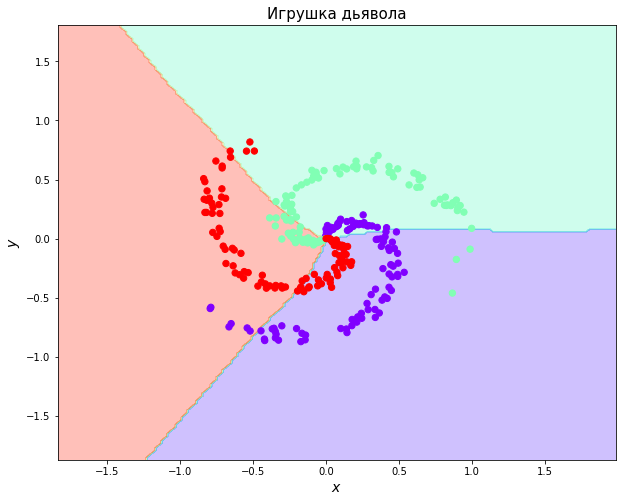

In [16]:
# Отрисовочная магия, снова взято из:
# http://cs231n.github.io/neural-networks-case-study/#linear

h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
grid_tensor = torch.FloatTensor(np.c_[xx.ravel(), yy.ravel()])

Z = two_layer_net(torch.autograd.Variable(grid_tensor))
Z = Z.data.numpy()
Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 8))

plt.contourf(xx, yy, Z, cmap=plt.cm.rainbow, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.rainbow)

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.title('Игрушка дьявола', fontsize=15)
plt.xlabel('$x$', fontsize=14)
plt.ylabel('$y$', fontsize=14)
plt.show();

Качество не очень. Как же так, ведь мы использовали 100 нейронов? Разве их мало?

---

### Задача 2

Улучшите сеть (помните про вещи, которые можно менять (см. Компоненты нейросети)). Экспериментируйте, в этом **вся суть deep learning** (и в том, чтобы рано или поздно сетка научилась экспериментировать за Вас :)

In [22]:
# Ваш код здесь (можно (и нужно) создавать больше ячеек)

X = torch.autograd.Variable(torch.FloatTensor(X))
y = torch.autograd.Variable(torch.LongTensor(y.astype(np.int64)))


# пример взят из официального туториала: 
# https://pytorch.org/tutorials/beginner/pytorch_with_examples.html

# N - размер батча (batch_size, нужно для метода оптимизации); 
# D_in - размерность входа (количество признаков у объекта);
# H - размерность скрытых слоёв; 
# D_out - размерность выходного слоя (суть - количество классов)
N, D_in, H, D_out = 64, 2, 100, 3

# Use the nn package to define our model and loss function.
two_layer_net = torch.nn.Sequential(
    torch.nn.Linear(D_in, H),
    torch.nn.ReLU(),
    torch.nn.Linear(H, D_out),
)

loss_fn = torch.nn.CrossEntropyLoss(size_average=False)

learning_rate = 1e-4
optimizer = torch.optim.Adam(two_layer_net.parameters(), lr=learning_rate)
for t in range(5000):
    # forward
    y_pred = two_layer_net(X)

    # loss
    loss = loss_fn(y_pred, y)
    print('{} {}'.format(t, loss.data))

    # ЗАНУЛЯЕМ!
    optimizer.zero_grad()

    # backward
    loss.backward()

    # ОБНОВЛЯЕМ! 
    optimizer.step()

C:\Users\ccord517\Anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


0 335.3009033203125
1 335.0822448730469
2 334.8639831542969
3 334.64599609375
4 334.4283752441406
5 334.21124267578125
6 333.9945983886719
7 333.7782897949219
8 333.5624694824219
9 333.3468933105469
10 333.1319274902344
11 332.9172058105469
12 332.70306396484375
13 332.4893493652344
14 332.27587890625
15 332.06298828125
16 331.8503723144531
17 331.6384582519531
18 331.4268798828125
19 331.2158203125
20 331.00506591796875
21 330.7947998046875
22 330.58514404296875
23 330.3758239746094
24 330.1669921875
25 329.9585876464844
26 329.75079345703125
27 329.54315185546875
28 329.33599853515625
29 329.12957763671875
30 328.9234924316406
31 328.717529296875
32 328.5124206542969
33 328.30731201171875
34 328.10302734375
35 327.8989562988281
36 327.6954650878906
37 327.49237060546875
38 327.2893371582031
39 327.0873107910156
40 326.8853759765625
41 326.6839294433594
42 326.4826965332031
43 326.2821044921875
44 326.0820007324219
45 325.88226318359375
46 325.68292236328125
47 325.48388671875
48 325.

428 267.537353515625
429 267.41900634765625
430 267.30072021484375
431 267.1824035644531
432 267.0644836425781
433 266.94671630859375
434 266.82904052734375
435 266.7115783691406
436 266.5943298339844
437 266.47723388671875
438 266.3602600097656
439 266.243408203125
440 266.1267395019531
441 266.0101318359375
442 265.8936767578125
443 265.7776184082031
444 265.6614074707031
445 265.54534912109375
446 265.4296875
447 265.3140869140625
448 265.19854736328125
449 265.0831298828125
450 264.9678955078125
451 264.8528137207031
452 264.7379455566406
453 264.6231384277344
454 264.5084228515625
455 264.3941650390625
456 264.27996826171875
457 264.1658630371094
458 264.0517883300781
459 263.93817138671875
460 263.8243713378906
461 263.7109680175781
462 263.59765625
463 263.4841613769531
464 263.3711242675781
465 263.2582702636719
466 263.1452941894531
467 263.0327453613281
468 262.9203186035156
469 262.80804443359375
470 262.69573974609375
471 262.58367919921875
472 262.47186279296875
473 262.36

847 229.03900146484375
848 228.96923828125
849 228.89927673339844
850 228.82965087890625
851 228.7599334716797
852 228.69052124023438
853 228.6209716796875
854 228.55169677734375
855 228.4825439453125
856 228.413330078125
857 228.34414672851562
858 228.2753143310547
859 228.20640563964844
860 228.13755798339844
861 228.0688018798828
862 228.00021362304688
863 227.93170166015625
864 227.8631591796875
865 227.7947998046875
866 227.7264404296875
867 227.65818786621094
868 227.5899658203125
869 227.52197265625
870 227.45382690429688
871 227.3858184814453
872 227.3179931640625
873 227.2502899169922
874 227.18267822265625
875 227.11512756347656
876 227.0475616455078
877 226.98019409179688
878 226.91287231445312
879 226.845703125
880 226.7785186767578
881 226.7115478515625
882 226.6444854736328
883 226.57754516601562
884 226.5107421875
885 226.44390869140625
886 226.37728881835938
887 226.31063842773438
888 226.24424743652344
889 226.177734375
890 226.11134338378906
891 226.04495239257812
892

1264 205.73667907714844
1265 205.6914825439453
1266 205.6462860107422
1267 205.60108947753906
1268 205.555908203125
1269 205.51083374023438
1270 205.46585083007812
1271 205.4207763671875
1272 205.37583923339844
1273 205.33082580566406
1274 205.2859649658203
1275 205.2410125732422
1276 205.19618225097656
1277 205.15126037597656
1278 205.10658264160156
1279 205.06179809570312
1280 205.0169677734375
1281 204.9720916748047
1282 204.92758178710938
1283 204.88302612304688
1284 204.83831787109375
1285 204.7938995361328
1286 204.7494354248047
1287 204.70494079589844
1288 204.66055297851562
1289 204.61619567871094
1290 204.57191467285156
1291 204.5275421142578
1292 204.48336791992188
1293 204.4390869140625
1294 204.39492797851562
1295 204.35079956054688
1296 204.3066864013672
1297 204.2626190185547
1298 204.2186737060547
1299 204.1746826171875
1300 204.13075256347656
1301 204.08685302734375
1302 204.04295349121094
1303 203.99917602539062
1304 203.9553985595703
1305 203.91162109375
1306 203.8679

1671 189.52862548828125
1672 189.4927215576172
1673 189.456787109375
1674 189.42091369628906
1675 189.38502502441406
1676 189.34915161132812
1677 189.31329345703125
1678 189.27752685546875
1679 189.24163818359375
1680 189.20571899414062
1681 189.17005920410156
1682 189.13417053222656
1683 189.09829711914062
1684 189.06256103515625
1685 189.02671813964844
1686 188.99107360839844
1687 188.95538330078125
1688 188.919677734375
1689 188.8839874267578
1690 188.8483428955078
1691 188.81271362304688
1692 188.77720642089844
1693 188.7416534423828
1694 188.70608520507812
1695 188.67042541503906
1696 188.6348419189453
1697 188.59934997558594
1698 188.5637969970703
1699 188.5282745361328
1700 188.49270629882812
1701 188.4572296142578
1702 188.42173767089844
1703 188.38607788085938
1704 188.35073852539062
1705 188.31533813476562
1706 188.27980041503906
1707 188.24436950683594
1708 188.2088623046875
1709 188.17347717285156
1710 188.13807678222656
1711 188.10264587402344
1712 188.06723022460938
1713 

2062 176.3539276123047
2063 176.32244873046875
2064 176.291015625
2065 176.25950622558594
2066 176.22808837890625
2067 176.196533203125
2068 176.16502380371094
2069 176.13356018066406
2070 176.1021270751953
2071 176.07049560546875
2072 176.03919982910156
2073 176.00775146484375
2074 175.9761962890625
2075 175.9449005126953
2076 175.91348266601562
2077 175.88211059570312
2078 175.85067749023438
2079 175.81942749023438
2080 175.7880096435547
2081 175.75668334960938
2082 175.72544860839844
2083 175.6942138671875
2084 175.66275024414062
2085 175.63140869140625
2086 175.60020446777344
2087 175.56906127929688
2088 175.53768920898438
2089 175.50633239746094
2090 175.47511291503906
2091 175.4438018798828
2092 175.41259765625
2093 175.3813934326172
2094 175.35015869140625
2095 175.31878662109375
2096 175.28759765625
2097 175.2564697265625
2098 175.2252960205078
2099 175.19412231445312
2100 175.1629180908203
2101 175.13180541992188
2102 175.1006317138672
2103 175.06951904296875
2104 175.03843688

2481 163.71156311035156
2482 163.68238830566406
2483 163.65309143066406
2484 163.62379455566406
2485 163.59457397460938
2486 163.56532287597656
2487 163.53604125976562
2488 163.5067596435547
2489 163.47755432128906
2490 163.44821166992188
2491 163.4190216064453
2492 163.38975524902344
2493 163.36056518554688
2494 163.3313446044922
2495 163.30226135253906
2496 163.2728729248047
2497 163.2436981201172
2498 163.2145233154297
2499 163.1852264404297
2500 163.15618896484375
2501 163.126953125
2502 163.0977783203125
2503 163.06845092773438
2504 163.039306640625
2505 163.0101776123047
2506 162.98097229003906
2507 162.95175170898438
2508 162.92251586914062
2509 162.89334106445312
2510 162.86415100097656
2511 162.83494567871094
2512 162.8057403564453
2513 162.77658081054688
2514 162.7474822998047
2515 162.71826171875
2516 162.68911743164062
2517 162.65994262695312
2518 162.6309814453125
2519 162.60174560546875
2520 162.57269287109375
2521 162.5435333251953
2522 162.51443481445312
2523 162.485260

2892 152.01504516601562
2893 151.9873504638672
2894 151.95962524414062
2895 151.93203735351562
2896 151.90432739257812
2897 151.8765869140625
2898 151.84890747070312
2899 151.82131958007812
2900 151.7935791015625
2901 151.76589965820312
2902 151.73818969726562
2903 151.71051025390625
2904 151.6827392578125
2905 151.65509033203125
2906 151.62734985351562
2907 151.5997314453125
2908 151.5720977783203
2909 151.5443878173828
2910 151.51669311523438
2911 151.48916625976562
2912 151.46141052246094
2913 151.43370056152344
2914 151.4059600830078
2915 151.37832641601562
2916 151.3506622314453
2917 151.32313537597656
2918 151.29541015625
2919 151.26780700683594
2920 151.24020385742188
2921 151.2124786376953
2922 151.1848602294922
2923 151.15724182128906
2924 151.1295166015625
2925 151.10202026367188
2926 151.07440185546875
2927 151.0467529296875
2928 151.01913452148438
2929 150.99143981933594
2930 150.9637908935547
2931 150.9362335205078
2932 150.9086456298828
2933 150.8810272216797
2934 150.853

3294 140.995361328125
3295 140.96856689453125
3296 140.94183349609375
3297 140.91488647460938
3298 140.88824462890625
3299 140.86134338378906
3300 140.8345489501953
3301 140.80776977539062
3302 140.78103637695312
3303 140.75411987304688
3304 140.7273406982422
3305 140.70062255859375
3306 140.67372131347656
3307 140.64683532714844
3308 140.62013244628906
3309 140.59324645996094
3310 140.56642150878906
3311 140.53961181640625
3312 140.51287841796875
3313 140.48597717285156
3314 140.45907592773438
3315 140.43243408203125
3316 140.4055633544922
3317 140.37876892089844
3318 140.3519744873047
3319 140.3252716064453
3320 140.29840087890625
3321 140.27166748046875
3322 140.24490356445312
3323 140.21810913085938
3324 140.19140625
3325 140.16464233398438
3326 140.13792419433594
3327 140.111083984375
3328 140.08438110351562
3329 140.05760192871094
3330 140.03103637695312
3331 140.00433349609375
3332 139.97756958007812
3333 139.95086669921875
3334 139.92417907714844
3335 139.89744567871094
3336 13

3710 130.2054443359375
3711 130.1804962158203
3712 130.1555938720703
3713 130.130615234375
3714 130.10568237304688
3715 130.08078002929688
3716 130.05587768554688
3717 130.03094482421875
3718 130.0060272216797
3719 129.9811553955078
3720 129.9562530517578
3721 129.93133544921875
3722 129.90655517578125
3723 129.88162231445312
3724 129.85671997070312
3725 129.8318634033203
3726 129.80699157714844
3727 129.78213500976562
3728 129.7572784423828
3729 129.73243713378906
3730 129.70748901367188
3731 129.6826934814453
3732 129.6578826904297
3733 129.63304138183594
3734 129.6082000732422
3735 129.58334350585938
3736 129.5585479736328
3737 129.53375244140625
3738 129.5089111328125
3739 129.4840850830078
3740 129.45936584472656
3741 129.43460083007812
3742 129.40982055664062
3743 129.38499450683594
3744 129.36013793945312
3745 129.33544921875
3746 129.31072998046875
3747 129.28590393066406
3748 129.26119995117188
3749 129.2363739013672
3750 129.211669921875
3751 129.1869354248047
3752 129.162261

4128 120.16603088378906
4129 120.14291381835938
4130 120.11973571777344
4131 120.09654998779297
4132 120.07345581054688
4133 120.05037689208984
4134 120.02720642089844
4135 120.004150390625
4136 119.98101043701172
4137 119.95790100097656
4138 119.93470764160156
4139 119.91173553466797
4140 119.88861846923828
4141 119.86546325683594
4142 119.84236145019531
4143 119.81929016113281
4144 119.79624938964844
4145 119.77313995361328
4146 119.75009155273438
4147 119.72698974609375
4148 119.70392608642578
4149 119.6808853149414
4150 119.65784454345703
4151 119.63481903076172
4152 119.61164855957031
4153 119.58869171142578
4154 119.5656509399414
4155 119.54254150390625
4156 119.51945495605469
4157 119.4963607788086
4158 119.47328186035156
4159 119.45023345947266
4160 119.42715454101562
4161 119.404052734375
4162 119.38098907470703
4163 119.35785675048828
4164 119.33484649658203
4165 119.31173706054688
4166 119.28868103027344
4167 119.26565551757812
4168 119.24259185791016
4169 119.21953582763672

4545 110.81329345703125
4546 110.79156494140625
4547 110.76988220214844
4548 110.74819946289062
4549 110.7264633178711
4550 110.70475006103516
4551 110.68299865722656
4552 110.6612777709961
4553 110.63954162597656
4554 110.61784362792969
4555 110.59616088867188
4556 110.57442474365234
4557 110.5527572631836
4558 110.53102111816406
4559 110.50929260253906
4560 110.4875717163086
4561 110.46590423583984
4562 110.44414520263672
4563 110.4224624633789
4564 110.40071868896484
4565 110.37909698486328
4566 110.35736846923828
4567 110.3356704711914
4568 110.3139877319336
4569 110.29232025146484
4570 110.27066802978516
4571 110.24898529052734
4572 110.22733306884766
4573 110.20561981201172
4574 110.18394470214844
4575 110.16229248046875
4576 110.14061737060547
4577 110.11897277832031
4578 110.09729766845703
4579 110.0756607055664
4580 110.05406951904297
4581 110.03236389160156
4582 110.0107650756836
4583 109.98910522460938
4584 109.96751403808594
4585 109.94587707519531
4586 109.92420959472656
4

4946 102.35953521728516
4947 102.33916473388672
4948 102.31889343261719
4949 102.29854583740234
4950 102.27823638916016
4951 102.25782775878906
4952 102.23751831054688
4953 102.2171859741211
4954 102.19686126708984
4955 102.17652130126953
4956 102.15624237060547
4957 102.13593292236328
4958 102.11564636230469
4959 102.09529113769531
4960 102.07502746582031
4961 102.05474853515625
4962 102.03447723388672
4963 102.01421356201172
4964 101.9939193725586
4965 101.97366333007812
4966 101.95335388183594
4967 101.93314361572266
4968 101.91281127929688
4969 101.89257049560547
4970 101.87236785888672
4971 101.8520736694336
4972 101.83186340332031
4973 101.8116455078125
4974 101.7913818359375
4975 101.77119445800781
4976 101.7509994506836
4977 101.73072052001953
4978 101.71056365966797
4979 101.69043731689453
4980 101.67017364501953
4981 101.65005493164062
4982 101.62983703613281
4983 101.60971069335938
4984 101.5895767211914
4985 101.5694351196289
4986 101.54937744140625
4987 101.52925872802734


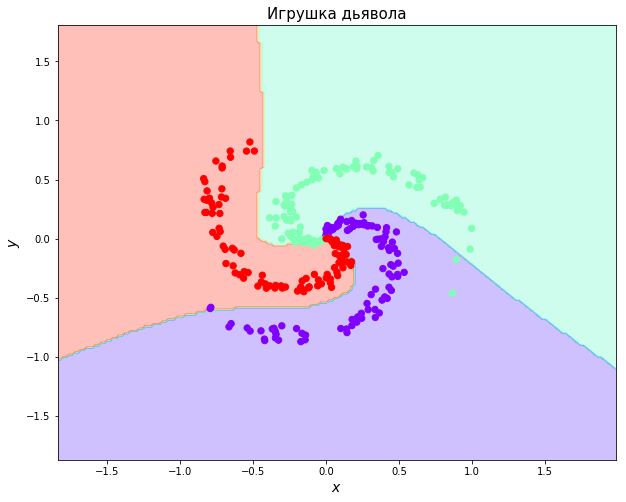

In [23]:
# Обратно в Numpy для отрисовки
X = X.data.numpy()
y = y.data.numpy()

# Отрисовочная магия, снова взято из:
# http://cs231n.github.io/neural-networks-case-study/#linear

h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
grid_tensor = torch.FloatTensor(np.c_[xx.ravel(), yy.ravel()])

Z = two_layer_net(torch.autograd.Variable(grid_tensor))
Z = Z.data.numpy()
Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 8))

plt.contourf(xx, yy, Z, cmap=plt.cm.rainbow, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.rainbow)

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.title('Игрушка дьявола', fontsize=15)
plt.xlabel('$x$', fontsize=14)
plt.ylabel('$y$', fontsize=14)
plt.show();

---

<h3 style="text-align: center;"><b>Полезные ссылки</b></h3>

1). *Примеры написания нейросетей на PyTorch (офийиальные туториалы) (на английском): https://pytorch.org/tutorials/beginner/pytorch_with_examples.html#examples  
https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html*

2). ***Один из самых подробных и полных курсов по deep learning на данный момент - это курс Стэнфордского Университета (он вообще сейчас один из лидеров в области ИИ, его выпускники работают в Google, Facebook, Amazon, Microsoft, в стартапах в Кремниевой долине):  http://cs231n.github.io/***  

3). Практически исчерпывающая информация по основам нейросетей (из cs231n) (на английском):  

http://cs231n.github.io/neural-networks-1/,  
http://cs231n.github.io/neural-networks-2/,  
http://cs231n.github.io/neural-networks-3/,  
http://cs231n.github.io/neural-networks-case-study/#linear

4). *Хорошие статьи по основам нейросетей (на английском):  http://neuralnetworksanddeeplearning.com/chap1.html*

5). *Наглядная демонстрация того, как обучаются нейросети:  https://cs.stanford.edu/people/karpathy/convnetjs/*

6). *Подробнее про backprop -- статья на Medium: https://medium.com/autonomous-agents/backpropagation-how-neural-networks-learn-complex-behaviors-9572ac161670*

7). *Статья из интернет по Backprop: http://page.mi.fu-berlin.de/rojas/neural/chapter/K7.pdf*